In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(all_train_images, all_train_labels), (all_test_images, all_test_labels) = mnist.load_data()
print("Train data's shape: ", all_train_images.shape)
print("Test data's shape: ", all_test_images.shape)

Train data's shape:  (60000, 28, 28)
Test data's shape:  (10000, 28, 28)


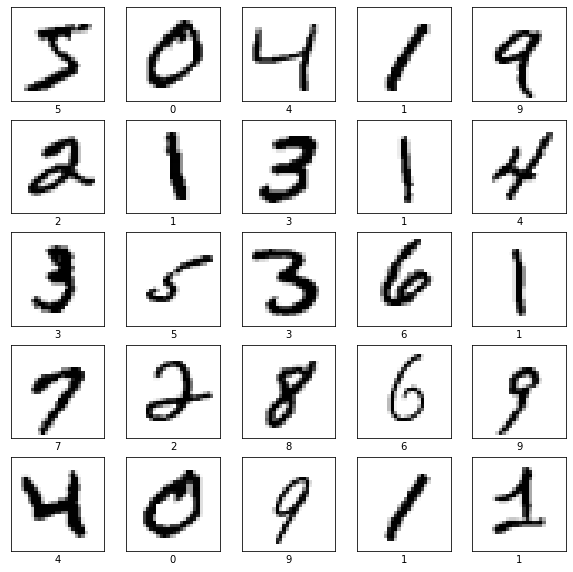

In [3]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(all_train_images[i], cmap = plt.cm.binary)
    plt.xlabel(all_train_labels[i])
plt.show()

In [4]:
train_filter      = np.where((all_train_labels == 0 ) | (all_train_labels == 2) | (all_train_labels == 4) | (all_train_labels == 6))
evaluation_filter = np.where((all_test_labels == 0 ) | (all_test_labels == 2) | (all_test_labels == 4) | (all_test_labels == 6))
Q4train_filter    = np.where((all_train_labels != 0 ) & (all_train_labels != 2) & (all_train_labels != 4) & (all_train_labels != 6))
test_filter       = np.where((all_test_labels != 0 ) & (all_test_labels != 2) & (all_test_labels != 4) & (all_test_labels != 6))

train_images, train_labels           = all_train_images[train_filter], all_train_labels[train_filter]
evaluation_images, evaluation_labels = all_test_images[evaluation_filter], all_test_labels[evaluation_filter]
Q4train_images, Q4train_labels       = all_train_images[Q4train_filter], all_train_labels[Q4train_filter]
test_images, test_labels             = all_test_images[test_filter], all_test_labels[test_filter]

The dataset to train image classifier and both autoencoder


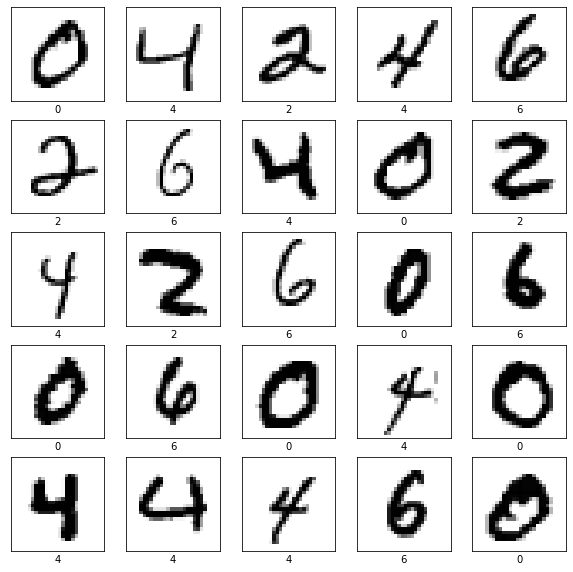

In [5]:
print("The dataset to train image classifier and both autoencoder")
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

The dataset to test trained model other than 0, 2, 4, 6


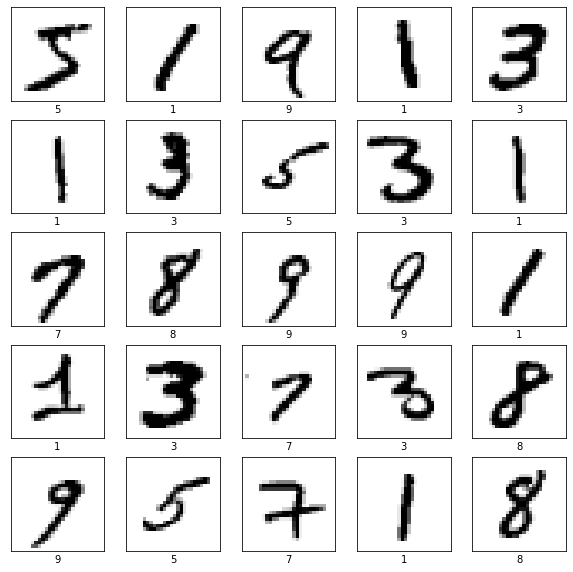

In [6]:
print("The dataset to test trained model other than 0, 2, 4, 6")
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Q4train_images[i], cmap = plt.cm.binary)
    plt.xlabel(Q4train_labels[i])
plt.show()

# Question1

In [7]:
imageClassifier = keras.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [8]:
imageClassifier.compile(optimizer = 'adam',
                        loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])

In [9]:
imageClassifier.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
739/739 [==============================] - 1s 913us/step - loss: 7.3626 - accuracy: 0.9206
Epoch 2/10
739/739 [==============================] - 1s 848us/step - loss: 0.3810 - accuracy: 0.9847
Epoch 3/10
739/739 [==============================] - 1s 846us/step - loss: 0.2323 - accuracy: 0.9881
Epoch 4/10
739/739 [==============================] - 1s 857us/step - loss: 0.2350 - accuracy: 0.9877
Epoch 5/10
739/739 [==============================] - 1s 852us/step - loss: 0.2192 - accuracy: 0.9883
Epoch 6/10
739/739 [==============================] - 1s 857us/step - loss: 0.1175 - accuracy: 0.9926
Epoch 7/10
739/739 [==============================] - 1s 852us/step - loss: 0.1630 - accuracy: 0.9913
Epoch 8/10
739/739 [==============================] - 1s 850us/step - loss: 0.1312 - accuracy: 0.9917
Epoch 9/10
739/739 [==============================] - 1s 858us/step - loss: 0.1288 - accuracy: 0.9919
Epoch 10/10
739/739 [==============================] - 1s 856us/step - loss: 0.117

In [10]:
Q1_EvaLoss, Q1_EvaAcc = imageClassifier.evaluate(evaluation_images, evaluation_labels)
print('Evaluation accuracy: ', Q1_EvaAcc)

124/124 [==============================] - 0s 683us/step - loss: 0.5843 - accuracy: 0.9841
Evaluation accuracy:  0.984058678150177


In [11]:
Q1_TestLoss, Q1_TestAcc = imageClassifier.evaluate(test_images, test_labels)
print('Test accuracy: ', Q1_TestAcc)

189/189 [==============================] - 0s 946us/step - loss: 336.3079 - accuracy: 0.0000e+00
Test accuracy:  0.0


# Question2

In [12]:
Ntrain_images      = train_images.astype('float32') / 255.
Nevaluation_images = evaluation_images.astype('float32') / 255.
Ntest_images       = test_images.astype('float32') / 255.

In [13]:
class normal_Autoencoder(keras.Model):
    def __init__(self):
        super(normal_Autoencoder, self).__init__()  
        self.encoder = keras.Sequential([
          layers.Flatten(),
          layers.Dense(64, activation = 'relu'),
          layers.Dense(32, activation = 'relu'),
          layers.Dense(16, activation = 'relu')
        ])
        self.decoder = keras.Sequential([
          layers.Dense(32, activation = 'relu'),
          layers.Dense(64, activation = 'relu'),
          layers.Dense(784, activation = 'sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

normalAutoencoder = normal_Autoencoder()

In [14]:
normalAutoencoder.compile(optimizer = 'adam', loss = 'mse')

In [15]:
normalAutoencoder.fit(Ntrain_images, Ntrain_images,
                      epochs = 10,
                      shuffle = True,
                      validation_data = (Nevaluation_images, Nevaluation_images))

Epoch 1/10
739/739 [==============================] - 2s 2ms/step - loss: 0.0775 - val_loss: 0.0368
Epoch 2/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0347 - val_loss: 0.0281
Epoch 3/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0275 - val_loss: 0.0244
Epoch 4/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0241 - val_loss: 0.0220
Epoch 5/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0221 - val_loss: 0.0208
Epoch 6/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0208 - val_loss: 0.0198
Epoch 7/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0199 - val_loss: 0.0193
Epoch 8/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0192 - val_loss: 0.0186
Epoch 9/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0188 - val_loss: 0.0181
Epoch 10/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0183 - val_loss: 0.0177

In [16]:
encoded_imgs = normalAutoencoder.encoder(Nevaluation_images).numpy()
decoded_imgs = normalAutoencoder.decoder(encoded_imgs).numpy()

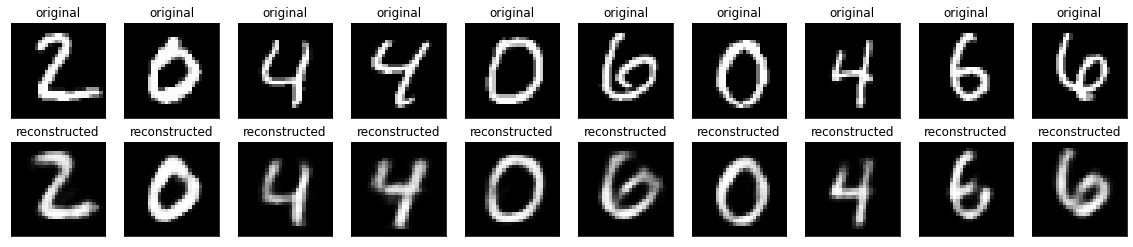

In [17]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(Nevaluation_images[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
encoded_imgs   = normalAutoencoder.encoder(Ntest_images).numpy()
Q2decoded_imgs = normalAutoencoder.decoder(encoded_imgs).numpy()

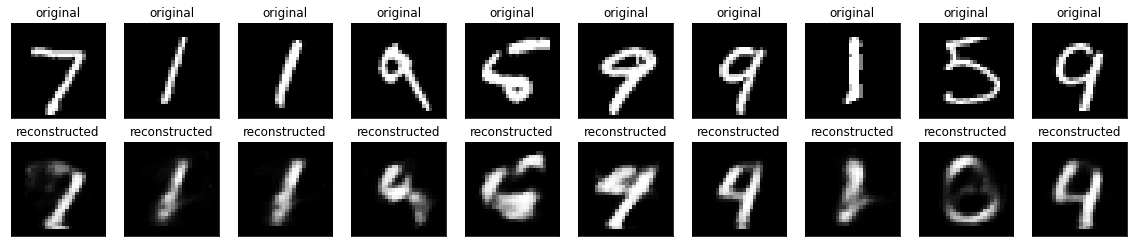

In [19]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(Ntest_images[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(Q2decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
reconstructions = normalAutoencoder.predict(Nevaluation_images)
train_loss = keras.losses.mae(reconstructions, Nevaluation_images)
g = []
for k in train_loss:
    g.append(np.sum(k))
    
threshold = np.mean(g) + np.std(g)

In [21]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = keras.losses.mae(reconstructions, data)
    g = []
    for k in loss:
        g.append(np.sum(k))
    return tf.math.less(g, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))

In [22]:
preds = predict(normalAutoencoder, Ntest_images, threshold)
Q2_TestAcc = 100 * np.count_nonzero(preds == False) / (len(Ntest_images))
print('Test accuracy: ', Q2_TestAcc)

Test accuracy:  53.3068783068783


# Question3

In [23]:
Q3train_images = Ntrain_images[..., tf.newaxis]
Q3eva_images   = Nevaluation_images[..., tf.newaxis]
Q3test_images  = Ntest_images[..., tf.newaxis]

In [24]:
noise_factor = 0.2
x_train_noisy = Q3train_images + noise_factor * tf.random.normal(shape = Q3train_images.shape)
x_eva_noisy   = Q3eva_images + noise_factor * tf.random.normal(shape = Q3eva_images.shape)
x_test_noisy  = Q3test_images + noise_factor * tf.random.normal(shape = Q3test_images.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min = 0., clip_value_max = 1.)
x_eva_noisy   = tf.clip_by_value(x_eva_noisy, clip_value_min = 0., clip_value_max = 1.)
x_test_noisy  = tf.clip_by_value(x_test_noisy, clip_value_min = 0., clip_value_max = 1.)

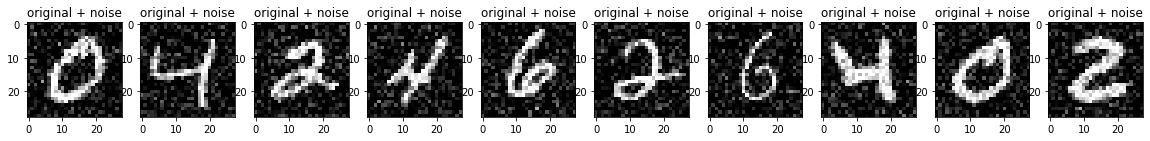

In [25]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_train_noisy[i]))
    plt.gray()
plt.show()

In [26]:
"""class Denoise(keras.Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = keras.Sequential([
      layers.Input(shape = (28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()"""

"class Denoise(keras.Model):\n  def __init__(self):\n    super(Denoise, self).__init__()\n    self.encoder = keras.Sequential([\n      layers.Input(shape = (28, 28, 1)),\n      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),\n      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])\n\n    self.decoder = keras.Sequential([\n      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),\n      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),\n      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])\n\n  def call(self, x):\n    encoded = self.encoder(x)\n    decoded = self.decoder(encoded)\n    return decoded\n\nautoencoder = Denoise()"

In [27]:
class Denoise(keras.Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = keras.Sequential([
          layers.Flatten(),
          layers.Dense(64, activation = 'relu'),
          layers.Dense(32, activation = 'relu'),
          layers.Dense(16, activation = 'relu')
        ])
        self.decoder = keras.Sequential([
          layers.Dense(32, activation = 'relu'),
          layers.Dense(64, activation = 'relu'),
          layers.Dense(784, activation = 'sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

denoisingAutoencoder = Denoise()

In [28]:
denoisingAutoencoder.compile(optimizer = 'adam', loss = 'mse')

In [29]:
denoisingAutoencoder.fit(x_train_noisy, Q3train_images,
                         epochs = 10,
                         shuffle = True,
                         validation_data = (x_eva_noisy, Q3eva_images))

Epoch 1/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0782 - val_loss: 0.0376
Epoch 2/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0360 - val_loss: 0.0307
Epoch 3/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0300 - val_loss: 0.0274
Epoch 4/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0272 - val_loss: 0.0261
Epoch 5/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0259 - val_loss: 0.0244
Epoch 6/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0242 - val_loss: 0.0234
Epoch 7/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0229 - val_loss: 0.0219
Epoch 8/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0218 - val_loss: 0.0212
Epoch 9/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0211 - val_loss: 0.0206
Epoch 10/10
739/739 [==============================] - 1s 1ms/step - loss: 0.0206 - val_loss: 0.0202

In [30]:
encoded_imgs = denoisingAutoencoder.encoder(Q3eva_images).numpy()
decoded_imgs = denoisingAutoencoder.decoder(encoded_imgs).numpy()

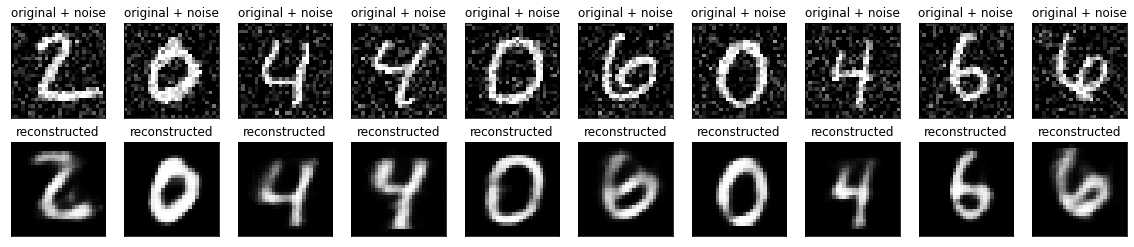

In [31]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_eva_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [32]:
encoded_imgs   = denoisingAutoencoder.encoder(Q3test_images).numpy()
Q3decoded_imgs = denoisingAutoencoder.decoder(encoded_imgs).numpy()

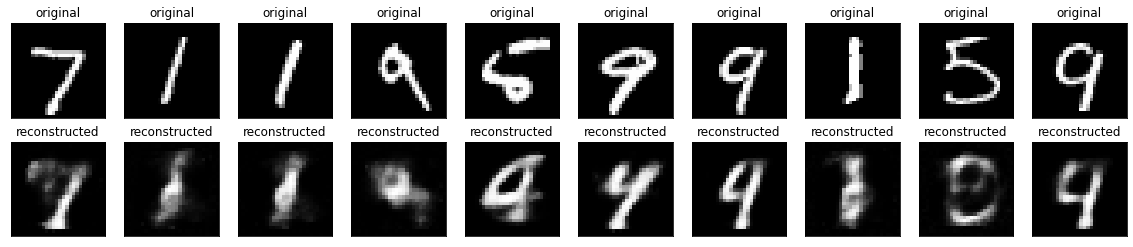

In [33]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
  # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(Q3test_images[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Q3decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [34]:
preds = predict(denoisingAutoencoder, Ntest_images, threshold)
Q3_TestAcc = 100 * np.count_nonzero(preds == False) / (len(Ntest_images))
print('Test accuracy: ', Q3_TestAcc)

Test accuracy:  71.2797619047619


# Question4

In [35]:
Q4_train = np.concatenate((train_images, evaluation_images), axis = 0)[0:27000]
Q4_test = test_images[0:3000]
Q4_all = np.concatenate((Q4_train, Q4_test), axis = 0)

In [36]:
isolationForest = IsolationForest(n_estimators = 200, max_samples = 'auto', contamination = 0.1)

In [37]:
isolationForest.fit(Q4_all.reshape(len(Q4_all), 784))

print(isolationForest.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 200, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [38]:
table = pd.DataFrame(data = isolationForest.decision_function(Q4_test.reshape(len(Q4_test), 784)), columns = ['scores'])
table['anomaly_score']    = isolationForest.predict(Q4_test.reshape(len(Q4_test), 784))
table

,scores,anomaly_score
0,0.053139,1
1,0.106241,1
2,0.097085,1
3,0.068445,1
4,0.027029,1
...,...,...
2995,0.101866,1
2996,0.074304,1
2997,0.083458,1
2998,0.044927,1


In [39]:
Q4_TestAcc = 100 * list(table['anomaly_score']).count(-1) / (len(Q4_test))
print('Test accuracy: ', Q4_TestAcc)

Test accuracy:  6.666666666666667


# Question5

In [40]:
print("Accuracy of the image classifier :", round(Q1_TestAcc, 2), '%')
print("Accuracy of the normal autoencoder  :", round(Q2_TestAcc, 2), '%')
print("Accuracy of the denosing autoencoder :", round(Q3_TestAcc, 2), '%')
print("Accuracy of the Isolated Forest method :", round(Q4_TestAcc, 2), '%')

Accuracy of the image classifier : 0.0 %
Accuracy of the normal autoencoder  : 53.31 %
Accuracy of the denosing autoencoder : 71.28 %
Accuracy of the Isolated Forest method : 6.67 %
